# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the drug regimen with more number of observered timepoint and the variance are the lowest one, that can tell us that these two drugs are the most effective reducing the volumn of the tumors.
- The drugs which shows the worst effectivileness are Ketapril and Naftisol.
- Capomulin shows effect in the body between 30 to 40 days. 
 

In [236]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice.
mice_num = data["Mouse ID"].nunique()
mice_num

249

In [35]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_duplicate = data.loc[data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_duplicate

array(['g989'], dtype=object)

In [36]:
# Optional: Get all the data for the duplicate mouse ID. 
mice_duplicate_df = data.loc[data.duplicated(['Mouse ID', 'Timepoint'])]
mice_duplicate_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [43]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data = data[data["Mouse ID"] != 'g989']
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [99]:
# Checking the number of mice in the clean DataFrame.
mice_num_1 = clean_data["Mouse ID"].nunique()
mice_num_1

248

## Summary Statistics

In [48]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stddev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summary_df = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median, "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": stddev, "Tumor Volume Std. Err.": sem})
summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [49]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg = clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

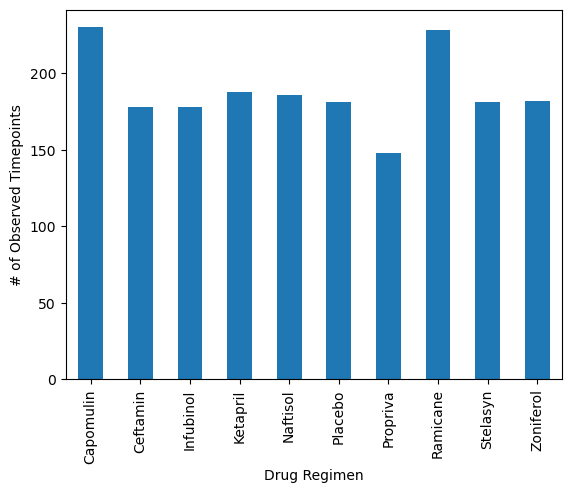

In [56]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
bar_graph = clean_data.groupby(clean_data["Drug Regimen"])["Mouse ID"].count()
bar_graph.plot(kind="bar").set_ylabel("# of Observed Timepoints")

plt.show()

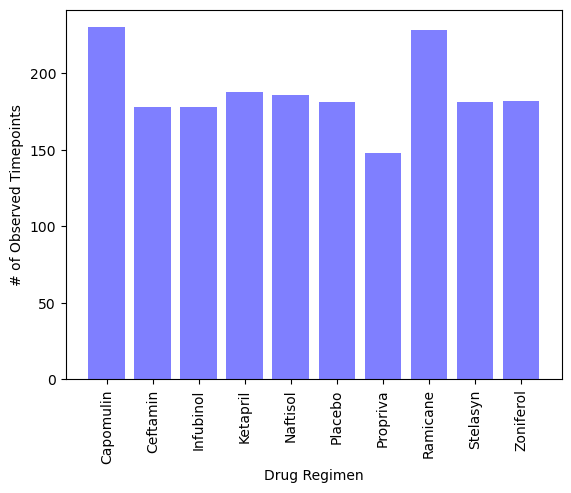

In [92]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
grouped_drug = clean_data.groupby("Drug Regimen")
drug_count = grouped_drug["Drug Regimen"].count()
x_axis = drug_count.index.values
y_axis = drug_count.values
graph_py = plt.bar(x_axis,y_axis, color='blue', alpha=0.5, align='center')
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Timepoints")
plt.xticks(rotation="vertical")
plt.show()

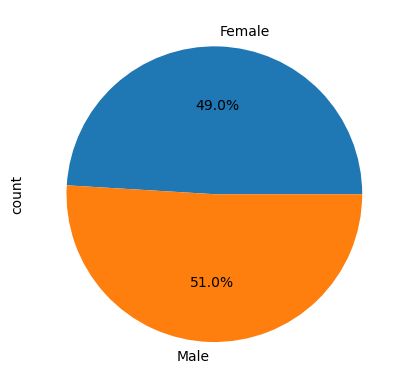

In [112]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
plot_graph = clean_data.groupby(clean_data["Sex"])["Sex"].value_counts()
plot_graph.plot(kind="pie", y="Sex",autopct = "%1.1f%%", legend=False)
plt.show()

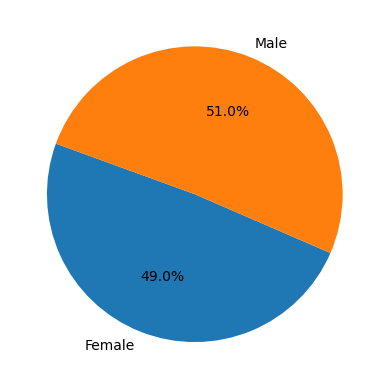

In [122]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
grouped_sex = clean_data.groupby("Sex")
drug_count_sex = grouped_sex["Sex"].count()
x_label = drug_count_sex.index.values
graph_py = plt.pie(drug_count_sex, labels=x_label, startangle=160, autopct='%1.1f%%',)

plt.show()

## Quartiles, Outliers and Boxplots

In [192]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
capomulin = data.loc[data["Drug Regimen"] == ("Capomulin"),:]
ramicane = data.loc[data["Drug Regimen"] == "Ramicane", :]
infubinol = data.loc[data["Drug Regimen"] == "Infubinol", :]
ceftamin = data.loc[data["Drug Regimen"] == "Ceftamin", :]
# Start by getting the last (greatest) timepoint for each mouse

capomulin_last = capomulin.groupby("Mouse ID").max()["Timepoint"]
ramicane_last = ramicane.groupby("Mouse ID").max()["Timepoint"]
infubinol_last = infubinol.groupby("Mouse ID").max()["Timepoint"]
ceftamin_last = ceftamin.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
group_capo = pd.merge(capomulin_last, clean_data, on=("Mouse ID","Timepoint"),how="left")
group_rami = pd.merge(ramicane_last, clean_data, on=("Mouse ID","Timepoint"),how="left") 
group_infu = pd.merge(infubinol_last, clean_data, on=("Mouse ID","Timepoint"),how="left")
group_ceft = pd.merge(ceftamin_last,  clean_data, on=("Mouse ID","Timepoint"),how="left")

group_capo

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
5,i557,45,Capomulin,Female,1,24,47.685963,1
6,i738,45,Capomulin,Female,23,20,37.311846,2
7,j119,45,Capomulin,Female,7,23,38.125164,1
8,j246,35,Capomulin,Female,21,21,38.753265,1
9,l509,45,Capomulin,Male,17,21,41.483008,3


In [191]:
# Put treatments into a list for for loop (and later for plot labels)

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Determine outliers using upper and lower bounds
tumor_capo = group_capo["Tumor Volume (mm3)"]

quartiles_capo =tumor_capo.quantile([.25,.5,.75])
lower_capo = quartiles_capo[0.25]
upper_capo = quartiles_capo[0.75]
iqr_capo = upper_capo-lower_capo
lower_bound_capo = lower_capo - (1.5*iqr_capo)
upper_bound_capo = upper_capo + (1.5*iqr_capo)

tumor_rami = group_rami["Tumor Volume (mm3)"]

quartiles_rami =tumor_rami.quantile([.25,.5,.75])
lower_rami = quartiles_rami[0.25]
upper_rami = quartiles_rami[0.75]
iqr_rami = upper_rami-lower_rami
lower_bound_rami = lower_rami - (1.5*iqr_rami)
upper_bound_rami = upper_rami + (1.5*iqr_rami)

tumor_infu = group_infu["Tumor Volume (mm3)"]

quartiles_infu =tumor_infu.quantile([.25,.5,.75])
lower_infu = quartiles_infu[0.25]
upper_infu = quartiles_infu[0.75]
iqr_infu = upper_infu-lower_infu
lower_bound_infu = lower_infu - (1.5*iqr_infu)
upper_bound_infu = upper_infu + (1.5*iqr_infu)

tumor_ceft = group_ceft["Tumor Volume (mm3)"]

quartiles_ceft =tumor_ceft.quantile([.25,.5,.75])
lower_ceft = quartiles_ceft[0.25]
upper_ceft = quartiles_ceft[0.75]
iqr_ceft = upper_ceft-lower_ceft
lower_bound_ceft = lower_ceft - (1.5*iqr_ceft)
upper_bound_ceft = upper_ceft + (1.5*iqr_ceft)


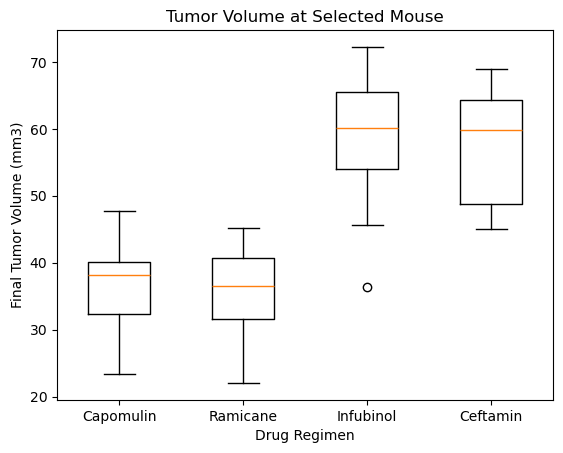

In [189]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
dist_plot = [tumor_capo, tumor_rami, tumor_infu, tumor_ceft]
Regimen = ['Capomulin', 'Ramicane', 'Infubinol','Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume at Selected Mouse')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(dist_plot, labels=Regimen, widths = 0.5, vert=True)
plt.show()

## Line and Scatter Plots

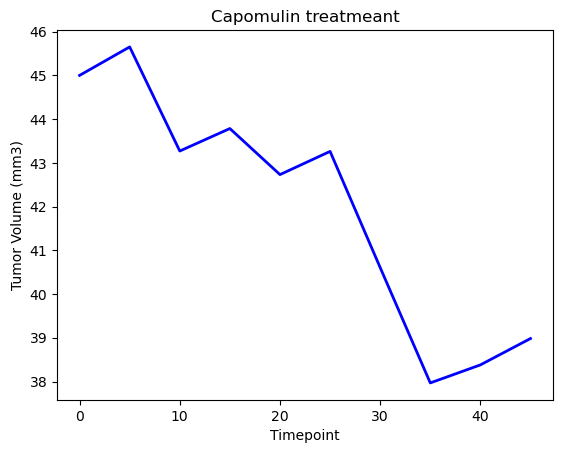

In [201]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
line_plot_df = capomulin.loc[capomulin["Mouse ID"] == "b128",:]
x_axis = line_plot_df["Timepoint"]
siz = line_plot_df["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant')
plt.plot(x_axis, siz,linewidth=2, markersize=15,color="blue", label="Fahreneit")
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

Text(0, 0.5, 'Ave. Tumor Volume (mm3)')

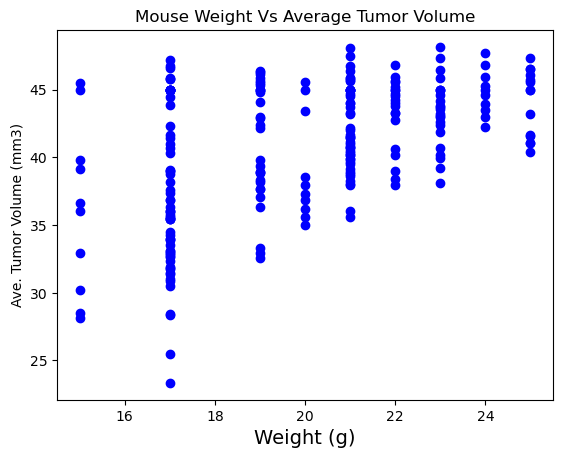

In [235]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
average = capomulin['Tumor Volume (mm3)']

plt.scatter(capomulin['Weight (g)'],average, color="blue")
plt.title('Mouse Weight Vs Average Tumor Volume')
plt.xlabel('Weight (g)',fontsize =14)
plt.ylabel('Ave. Tumor Volume (mm3)')


## Correlation and Regression

The r-squared is: 0.27636002234559204


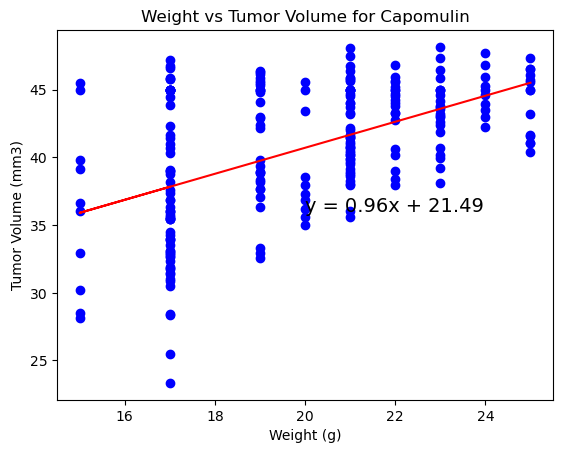

In [237]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

(slope, intercept,rvalue, pvalue, stderr)= linregress(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'])
regress_values=capomulin['Weight (g)']* slope + intercept
line_eq= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(capomulin['Weight (g)'],capomulin['Tumor Volume (mm3)'],color='b')
plt.plot(capomulin['Weight (g)'], regress_values, color='red')
plt.annotate(line_eq,(20,36), fontsize=14)
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Weight vs Tumor Volume for Capomulin")
print(f"The r-squared is: {rvalue**2}")
plt.show()